<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Data-and-Create-ICA_DATA-Object" data-toc-modified-id="Import-Data-and-Create-ICA_DATA-Object-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Data and Create ICA_DATA Object</a></span><ul class="toc-item"><li><span><a href="#Rename-iModulons" data-toc-modified-id="Rename-iModulons-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rename iModulons</a></span></li></ul></li><li><span><a href="#Create-Hypoxia-Time-Course-Figure" data-toc-modified-id="Create-Hypoxia-Time-Course-Figure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Create Hypoxia Time Course Figure</a></span></li></ul></div>

In [1]:
import sys
sys.path.append("../../Desktop/pymodulon/")

from pymodulon.core import *
from pymodulon.plotting import *
from pymodulon.enrichment import *
from pymodulon.compare import *
from pymodulon.io import *

from Bio.KEGG import REST
import tqdm.notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_venn import *
import seaborn as sns

from matplotlib.lines import Line2D

# Import Data and Create ICA_DATA Object

In [2]:
interim = "../data/interim/ica_runs/180/"
processed = "../data/processed_data/"

ica_data = IcaData(interim+"S.csv",interim+"A.csv", X=processed+"log_tpm_norm.csv",
                  sample_table=processed+"metadata_final.csv", trn = processed+"TRN.csv",
                   gene_table=processed+"gene_info.csv")


## Rename iModulons

In [3]:
comp_names = list(pd.read_csv(processed+"iModulon_names.csv",index_col=0).index)

rename = {}

for old,new in zip(range(0,80),comp_names):
    rename.update({old:new})

ica_data.rename_imodulons(rename)

ica_data.change_threshold("Central Carbon Metabolism",.05)
ica_data.change_threshold("Peptidoglycan Biosynthesis",.06)


ica_data.A.head()

,SRX3995807,SRX3995806,SRX3995809,SRX3995808,SRX4619048,SRX4619047,SRX4619049,SRX4619050,SRX3995804,SRX3995805,...,SRX4498326,SRX4498328,SRX4498330,SRX4498336,SRX4498333,SRX4498338,SRX4498329,SRX4498325,SRX4498327,SRX4498331
SigH,2.233529,1.747683,1.950159,1.272614,2.236327,1.461665,1.721740,1.716646,0.199084,-0.199084,...,-0.073048,-0.089859,-0.056653,0.272666,0.561386,0.565625,0.928080,0.692540,0.989420,0.978320
Polyketide Synthase Complex,-1.006571,-1.096669,-1.035640,-1.020379,-1.284973,-1.032381,-0.228997,-0.436043,-0.339446,0.339446,...,-0.060317,0.071409,0.197522,4.220594,4.335245,4.791054,2.873865,3.053068,3.106209,2.544357
IniR,-1.633546,-1.525702,-0.973362,-0.412119,-1.575615,-0.661602,-0.413391,-1.286532,-0.227573,0.227573,...,-0.082660,-0.249290,0.542238,-1.337300,-1.332386,-0.657241,-1.025463,-0.751884,-0.543233,-0.929784
PyrR,0.724746,0.685656,0.463208,0.779347,0.891500,0.706596,1.367180,1.396856,0.426180,-0.426180,...,0.094624,0.297912,-0.241379,1.186755,0.660442,0.640216,1.951114,2.235133,2.241501,1.747601
WhiB4,-0.187071,0.778767,-0.132223,0.820021,0.097570,1.035989,1.112930,0.707870,0.450103,-0.450103,...,-0.196057,-0.186073,0.212741,1.362617,1.387968,1.945811,1.459615,2.011044,1.298987,1.454773


# Create Hypoxia Time Course Figure

In [4]:
time_groups = ica_data.sample_table.groupby(["project","condition"])
time_projects = {}
for i, j in time_groups:
    if 'hypoxia' in i[0]:
        time_projects.update({i:list(j.index)})
        
time_points = [0,17,23,40,41,42,43,44,47,49,50,52,54,70,88,114.5,115,116,120]
oxygen = []
hypoxia_A = pd.DataFrame(index=ica_data.A.index)

for i,j in time_projects.items():
    oxygen.append(float(i[1].split("_")[1]))
    hypoxia_A[i[0]+":"+i[1]] = ica_data.A[j].mean(axis=1)
    
hypoxia_A["mean"] =  abs(hypoxia_A.mean(axis=1))
hypoxia_A = hypoxia_A.sort_values("mean",ascending=False)
hypoxia_A.drop(columns="mean",inplace=True)

hypoxia_A

,hypoxia:000h_.81_DO,hypoxia:017h_.57_DO,hypoxia:023h_.42_DO,hypoxia:040h_.11_DO,hypoxia:041h_.09_DO,hypoxia:042h_.07_DO,hypoxia:043h_.06_DO,hypoxia:044h_.04_DO,hypoxia:047h_0_DO,hypoxia:049h_0_DO,hypoxia:050h_0_DO,hypoxia:052h_0_DO,hypoxia:054h_0_DO,hypoxia:070h_0_DO,hypoxia:088h_0_DO,hypoxia:114.5h_.04_DO,hypoxia:115h_.06_DO,hypoxia:116h_.11_DO,hypoxia:120h_.47_DO
DevR-1,1.332268e-15,-6.867749,-7.127937,1.318617,5.113477,6.079262,9.028596,13.075385,19.770628,22.780155,22.868942,21.314352,20.435653,22.592518,23.427443,17.613524,17.183029,16.765279,10.100756
DevR-2,-5.181041e-16,-0.319798,-4.167777,-2.043925,1.392623,2.176005,5.070461,9.182896,17.701475,21.475824,21.305501,19.467661,18.910834,19.594254,21.935296,13.563118,14.440053,14.581952,8.215591
GroEL-GroES Complex,-4.996004e-16,10.494694,11.003719,11.668062,8.792090,6.699100,7.027150,5.737225,8.368677,7.402629,8.452411,8.667432,7.926125,8.561114,7.524040,7.152418,7.917766,8.178266,11.625384
Rv1828/SigH,0.000000e+00,8.400839,11.020026,11.593510,10.890568,10.185254,9.803417,9.594684,8.746602,11.477076,11.724340,10.791960,9.914156,7.742814,7.780235,3.261953,1.868884,0.110119,-5.228937
VirS,8.881784e-16,-8.522656,-9.488483,-8.939675,-9.433802,-9.914489,-10.081948,-8.640103,-9.364687,-8.746183,-7.721113,-5.457140,-5.741985,-2.173411,0.216838,-5.301138,-8.835620,-10.300514,-11.011316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M-box,-6.846375e-16,-4.228955,-2.366387,-2.667094,-2.921361,-0.643202,-1.193623,0.101494,-2.286577,1.551160,1.312943,3.676148,2.077023,1.447013,0.859159,3.624572,2.218552,1.514891,1.127628
Unc_3,-9.066821e-16,0.666059,1.065849,-0.136375,0.792931,1.512416,0.888044,0.514755,-0.264939,0.541653,0.319384,-0.561154,-0.347604,-1.816643,-0.529222,0.208855,-0.565181,-0.284267,0.193257
Blal,6.661338e-16,-2.860079,-2.190109,0.012795,-0.501149,-0.109246,-0.646292,-0.940116,0.230495,2.507043,2.986253,2.975554,2.962714,2.282971,2.267139,-1.233407,-3.138639,-3.857656,-2.251014
Nicotinate Metabolism,4.440892e-16,1.468098,-0.737692,1.353382,1.164336,1.844378,2.313621,1.590964,0.932606,0.126717,-0.652453,-1.097021,-0.740273,-3.321737,-2.594164,-1.469687,-0.136236,0.657010,0.763252


In [5]:
groups = ica_data.sample_table.groupby(["project","condition"])
activity_means = pd.DataFrame()
for i,j in groups:
    if "hypoxia" in i:
        activity_means[str(i[1]).split("_")[0]]= (ica_data.A[j.index].mean(axis=1))
        
max_val = []
for i,row in activity_means.iterrows():
    max_val.append(max(row))
activity_means["max"] = max_val
activity_means = activity_means.sort_values("max",ascending=False)
activity_means.drop(columns="max",inplace=True)
activity_means.head()

,000h,017h,023h,040h,041h,042h,043h,044h,047h,049h,050h,052h,054h,070h,088h,114.5h,115h,116h,120h
DevR-1,1.332268e-15,-6.867749,-7.127937,1.318617,5.113477,6.079262,9.028596,13.075385,19.770628,22.780155,22.868942,21.314352,20.435653,22.592518,23.427443,17.613524,17.183029,16.765279,10.100756
DevR-2,-5.181041e-16,-0.319798,-4.167777,-2.043925,1.392623,2.176005,5.070461,9.182896,17.701475,21.475824,21.305501,19.467661,18.910834,19.594254,21.935296,13.563118,14.440053,14.581952,8.215591
ArgR,1.221245e-15,1.132798,-0.518773,1.949674,1.680365,0.845087,1.909597,-0.209795,0.025504,2.272128,1.927961,2.771778,5.839000,12.462288,17.843777,9.939780,7.691238,6.313351,2.447563
RicR,-5.874930e-16,0.148022,5.036279,0.855907,0.476101,2.115829,1.254531,1.102765,2.264841,3.573990,3.288274,5.549993,4.804421,8.564106,12.606095,12.057256,10.442657,9.215165,5.626866
Rv1828/SigH,0.000000e+00,8.400839,11.020026,11.593510,10.890568,10.185254,9.803417,9.594684,8.746602,11.477076,11.724340,10.791960,9.914156,7.742814,7.780235,3.261953,1.868884,0.110119,-5.228937


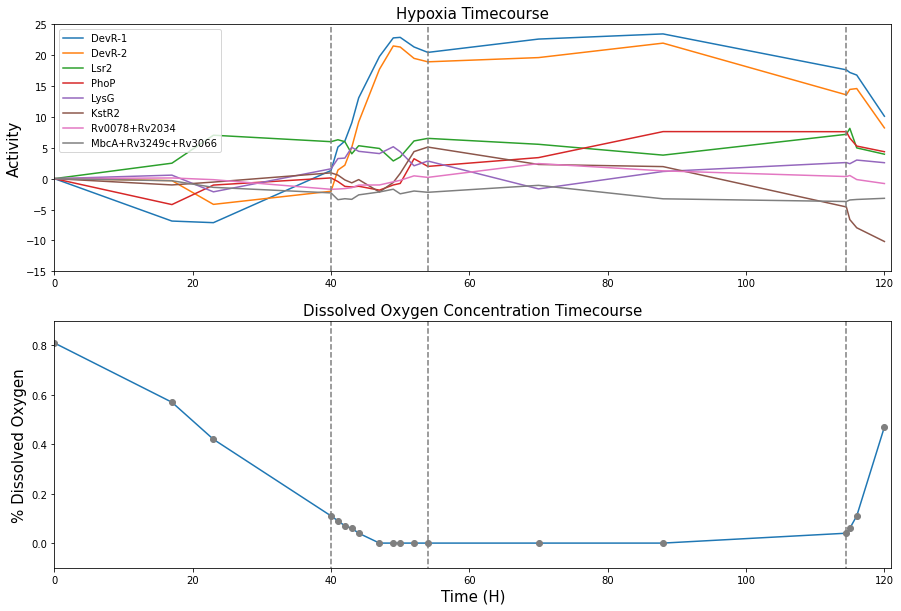

In [6]:
fig,[ax1,ax2] = plt.subplots(2,1,figsize=[15,10])
timepoints = [0,17,23,40,41,42,43,44,47,49,50,52,54,70,88,114.5,115,116,120]
imod = ["DevR-1","DevR-2","LysG","Lsr2","PhoP","KstR2","Rv0078+Rv2034","MbcA+Rv3249c+Rv3066"]
legend = []

for i in activity_means.index:
    if i in imod:
        ax1.plot(timepoints, activity_means.loc[i])
        legend.append(i)
        
ax1.plot([40,40],[-15,25],linestyle="--", color = "tab:grey")
ax1.plot([54,54],[-15,25],linestyle="--", color = "tab:grey")
ax1.plot([114.5,114.5],[-15,25],linestyle="--", color = "tab:grey")
ax1.set_ylim([-15,25])
ax1.set_xlim([0,121])
ax1.set_title("Hypoxia Timecourse",fontsize = 15)
ax1.set_ylabel("Activity",fontsize = 15)

ax2.plot(time_points,oxygen)
ax2.plot(time_points,oxygen,"o",color="tab:grey")
ax2.plot([40,40],[-1,1],linestyle="--", color = "tab:grey")
ax2.plot([54,54],[-1,1],linestyle="--", color = "tab:grey")
ax2.plot([114.5,114.5],[-1,1],linestyle="--", color = "tab:grey")
ax2.set_ylim([-.1,.9])
ax2.set_xlim([0,121])
ax2.set_title("Dissolved Oxygen Concentration Timecourse",fontsize=15)
ax2.set_xlabel("Time (H)",fontsize = 15)
ax2.set_ylabel("% Dissolved Oxygen",fontsize = 15)


ax1.legend(legend)
